In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [3]:
y = df.diagnosis
list = ['id', 'diagnosis']
x = df.drop(list, axis=1)
x.head

oversample = SMOTE()
x_n, y_n = oversample.fit_resample(x,y)


Number of Benign: 357
Number of Malignant: 357


C:\Users\63949\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


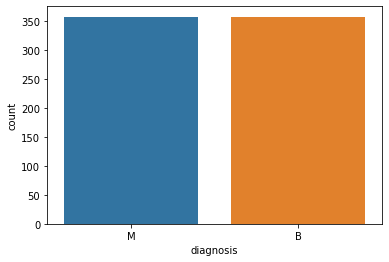

In [4]:
ax = sns.countplot(y_n, label="Count")
B, M = y_n.value_counts()
print('Number of Benign:', B)
print('Number of Malignant:', M)

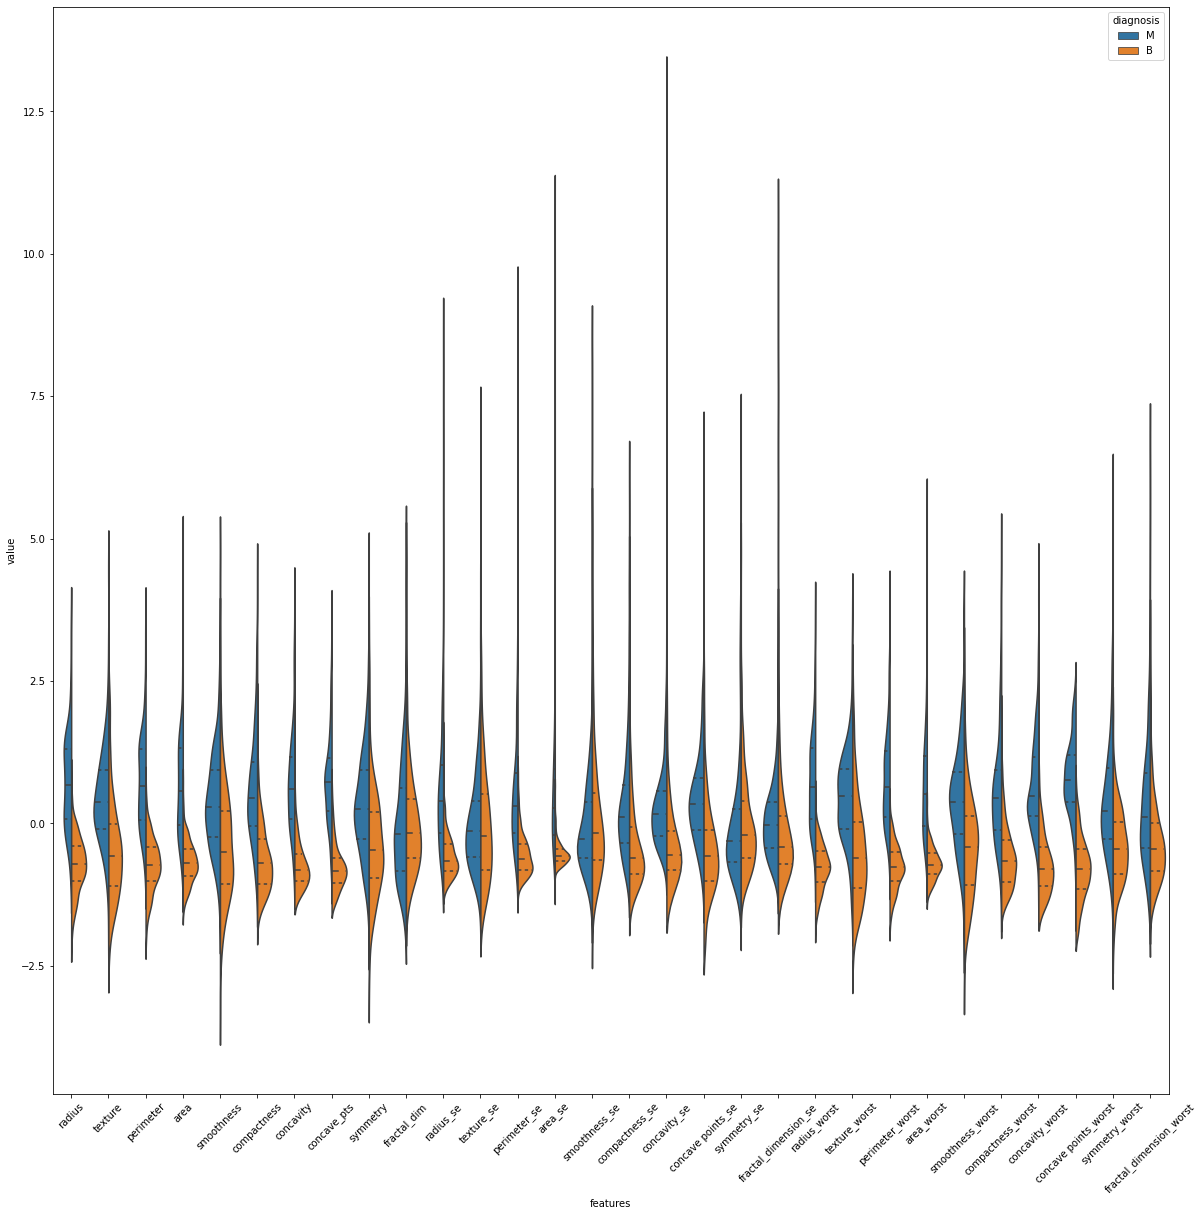

In [5]:
data_dia = y_n
data = x_n
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y_n, data_n_2], axis=1)
data = pd.melt(data,id_vars = "diagnosis", var_name = "features", value_name = 'value')
plt.figure(figsize=(20,20))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

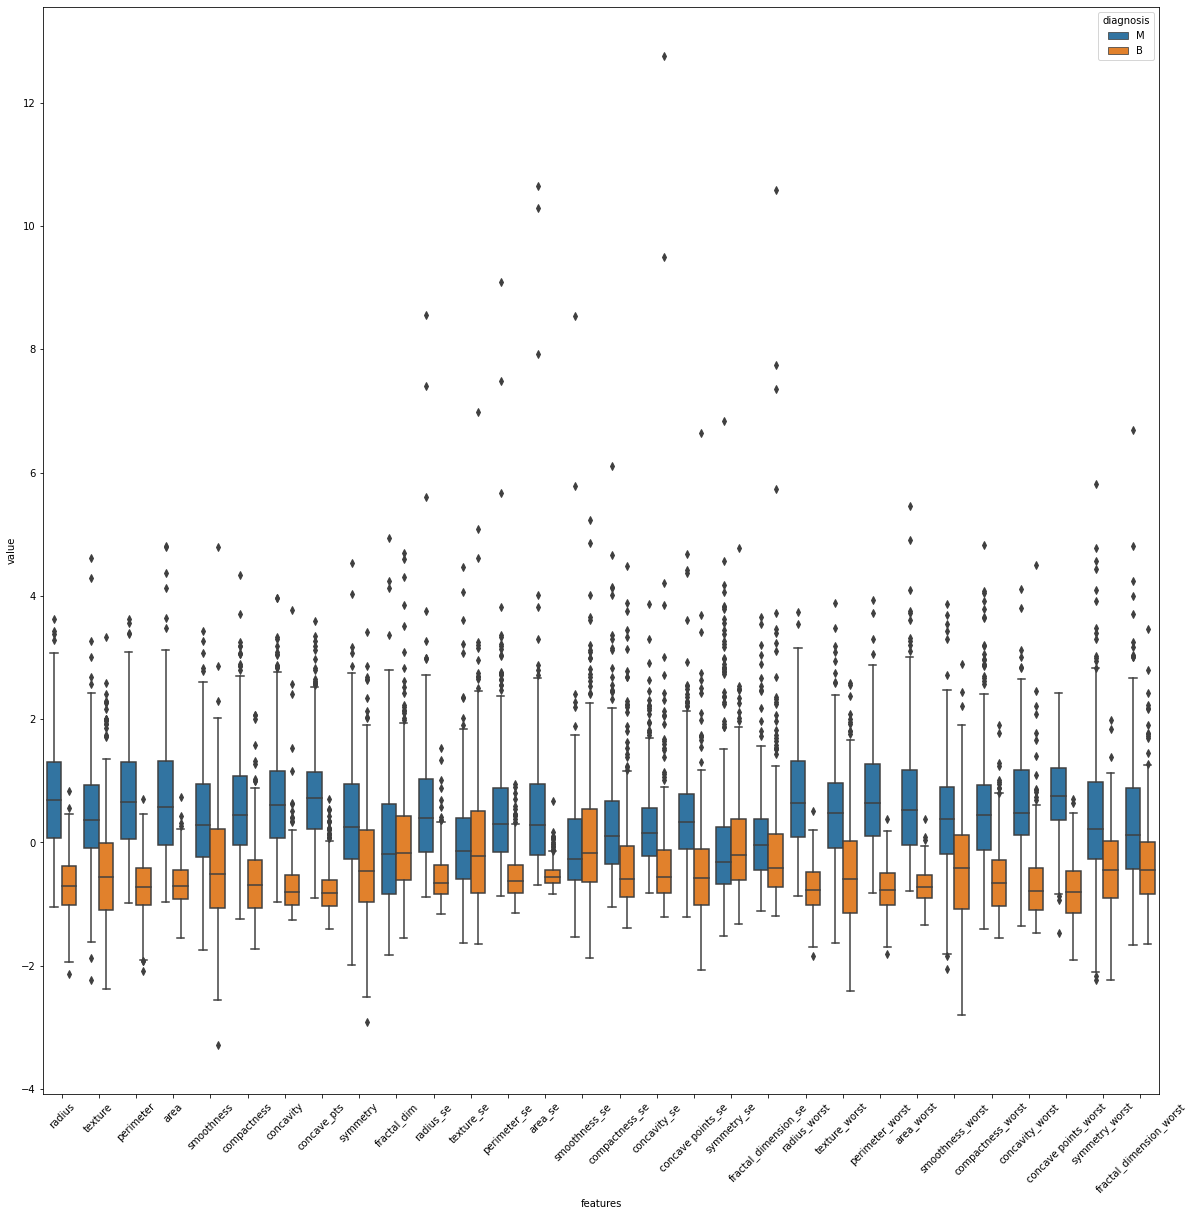

In [6]:
plt.figure(figsize=(20,20))
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

C:\Users\63949\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


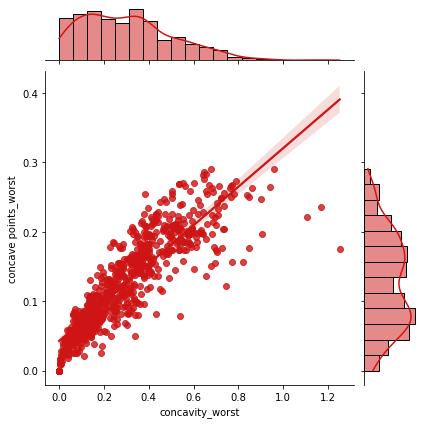

In [7]:
sns.jointplot(x_n.loc[:,'concavity_worst'],
              x_n.loc[:,'concave points_worst'],
              kind="reg",
              color="#ce1414");

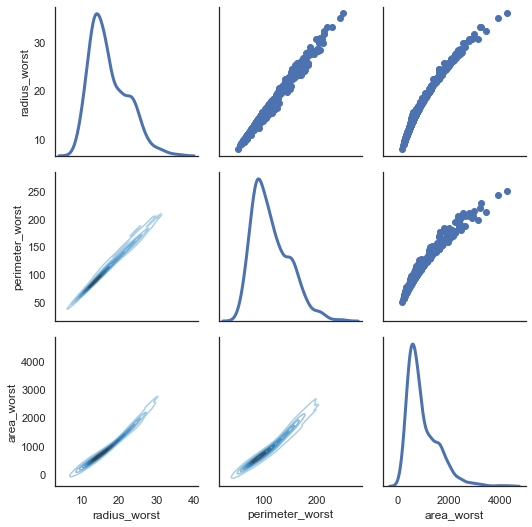

In [8]:
sns.set(style="white")
df = x_n.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.2% of the points

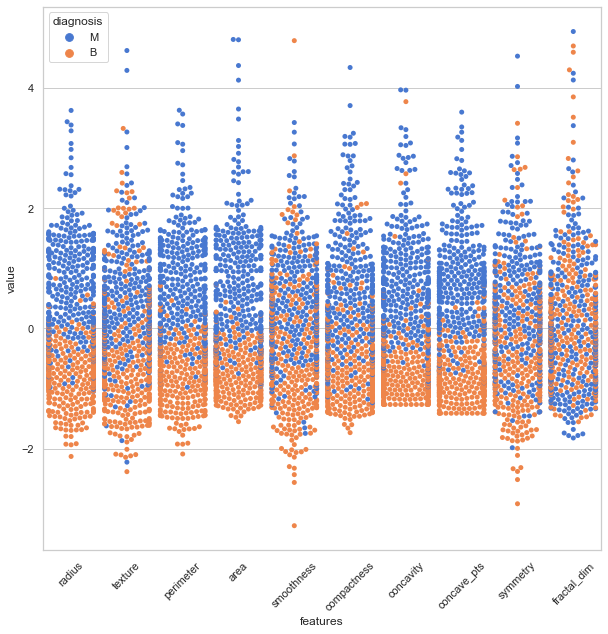

In [9]:
sns.set(style="whitegrid", palette="muted")
data_dia = y_n
data = x_n
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_n,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points

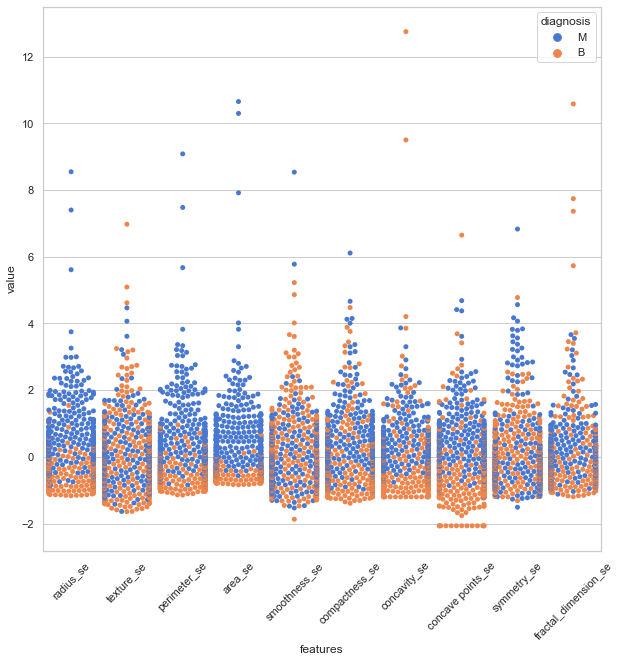

In [10]:
data = pd.concat([y_n,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\63949\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points

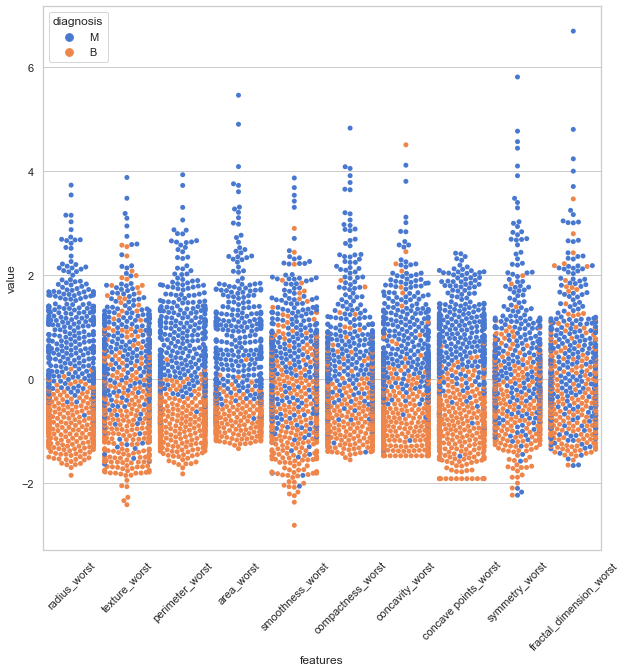

In [11]:
data = pd.concat([y_n,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

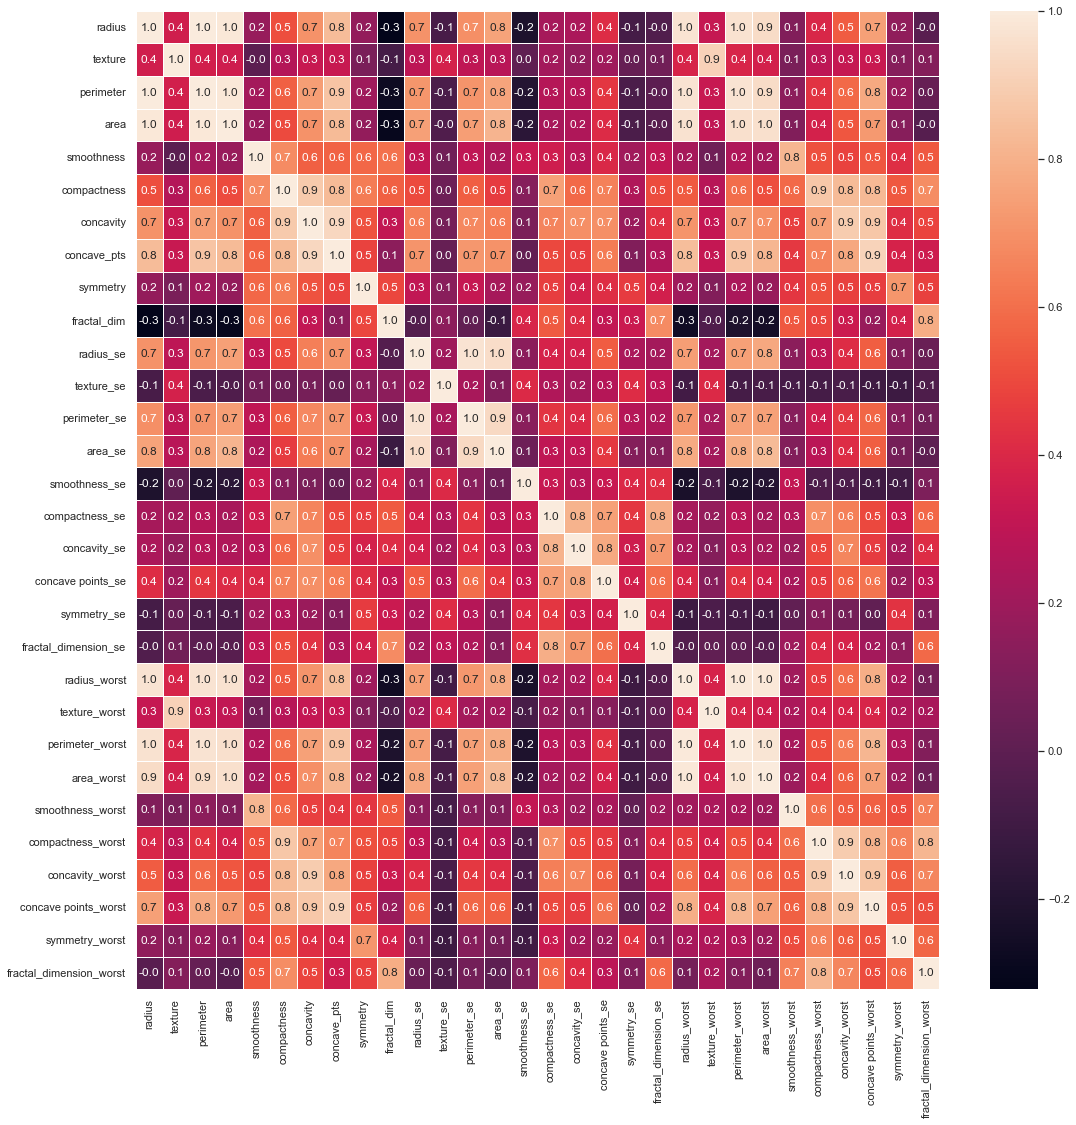

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_n.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [15]:
x_n


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,20.317439,24.613675,131.896204,1285.099358,0.090169,0.092732,0.115306,0.077725,0.159937,0.053423,...,23.973837,31.780661,158.588127,1741.175285,0.119920,0.213033,0.318447,0.153000,0.239313,0.068994
710,20.198892,26.631402,133.627984,1235.107940,0.098528,0.164649,0.162754,0.125136,0.187647,0.059944,...,24.158701,33.511410,159.728555,1670.612221,0.127180,0.336395,0.367261,0.213186,0.326502,0.075849
711,13.979617,21.319066,92.931396,619.222220,0.100145,0.155323,0.162417,0.069334,0.183326,0.067575,...,17.772218,29.628705,118.275661,970.743989,0.156119,0.469691,0.551139,0.157892,0.285719,0.100179
712,17.940694,20.881876,121.867729,993.117542,0.115557,0.208796,0.242625,0.107691,0.206658,0.067137,...,20.907430,26.870685,145.187710,1321.265482,0.172298,0.507982,0.683438,0.196784,0.317402,0.106460


In [16]:
x

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
